In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
# 페션!
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
# 이미지 입력시에는 채널에 대한 정보가 있어야함
# 지금은 Conv2D 를 적용하기 위해서 채널 차원을 추가 => 흑백이니까 채널을 1로 잡음
scaled_train = x_train.reshape(-1, 28,28,1) / 255

In [5]:
scaled_train.shape # 데이터의개수, 가로, 세로, 채널

(60000, 28, 28, 1)

In [19]:
scaled_train[0]

array([[[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
  

In [20]:
# 데이터 분할
scaled_train, scaled_val, y_train, y_val = train_test_split(
    scaled_train,
    y_train, 
    test_size=0.2,
    stratify=y_train,
    random_state=34
)

# 합성곱 신경망 모델 구성

1. 합성곱 층으로 이미지에서 특징을 감지
2. 밀집층으로 클래스에 따른 분류 확률을 계산

In [21]:
model = keras.Sequential()

# 입력층
model.add(keras.Input(shape = (28,28,1)))

# 합성곱층 추가
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation="relu", padding = "same"))


- 패션 MNIST 이미지가 (28, 28) 크기의 세임 패딩을 적용, 32개의 필터
- 출력되는 특성맵의 크기는 (28, 28, 32) => 자격증공부할때 이거 나옴

In [22]:
# 풀링층 추가
model.add(keras.layers.MaxPool2D(2))

- (2, 2) 크기의 커널을 이용하여 풀링을 적용해서 특성맵의 크기가 절반으로 줄어들고 특성맵의 깊이는 그대로
- 출력되는 특성맵의 크기 (14, 14, 32)

In [23]:
# 두 번째 합성곱 - 풀링층 추가
model.add(keras.layers.Conv2D(64, kernel_size = 3, activation="relu", padding= "same"))
model.add(keras.layers.MaxPool2D(2))

- (14, 14) 크기에 세임패딩, 64개 필터
    - 출력되는 특성맵 크기 (14, 14, 64)
 
- (2, 2) 크기의 커널을 이용하여 풀링
    - 출력되는 특성맵 크기(7, 7, 64)

In [24]:
# 3차원 특성맵을 일렬로 펼침 (분류를 하기위함)
# 10개의 유닛을 가진 밀집층에서 확률을 계산하기 때문에
model.add(keras.layers.Flatten())

In [25]:
# 밀집 은닉층 하나 더 추가한 후 드롭아웃을 넣어 과대적합을 방지하고 성능을 개선
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dropout(0.4))

In [26]:
# 출력층
# 10개의 클래스를 분류하는 다중 분류
model.add(keras.layers.Dense(10, activation = "softmax"))

In [27]:
# 모델 구조 확인
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │         313,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

- 뭐야... 맨뒤에 dense 1, 2 있었잖아.... 나 귀신을 본거임?????????????????

- 입력층 (28, 28, 1)
- 파라미터 개수
    - 첫 번째 합성곱 층 (kernel_size = 3 => (3, 3))
        - 필터의 크기 : (3, 3, 1)
        - 필터의 개수 : 32
        - 3 * 3 * 1 * 32 + 32 = 3136
    - 두 번째 합성곱 층
        - 필터의 크기 : (3, 3, 32)
        - 필터의 개수 : 64
        - 3 * 3 * 1 * 64 + 64 = 18,496
    - 밀집 은닉층
        - Flatten 층에서 (3136,) 크기의 배열이 전달 ( 7 * 7 * 64)
        - 3136 * 100 * 100 = 313,700
          
    - 출력층
        - 밀집 은닉층에서 (100, ) 크기의 배열이 전달
        - 100 * 10 + 10 = 1010

# 모델 훈련

In [28]:
cp_cb = keras.callbacks.ModelCheckpoint("./model/best-cnn-model.keras",save_best_only=True)
es_cb = keras.callbacks.EarlyStopping(patience=4, restore_best_weights= True)

In [29]:
model.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

In [30]:
history = model.fit(
    scaled_train, y_train, epochs=20, validation_split=0.2, callbacks=[es_cb, cp_cb], batch_size=32
)

Epoch 1/20
960/960 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7822 - loss: 0.6075 - val_accuracy: 0.8633 - val_loss: 0.3717
Epoch 2/20
960/960 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8588 - loss: 0.3951 - val_accuracy: 0.8850 - val_loss: 0.3221
Epoch 3/20
960/960 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8764 - loss: 0.3427 - val_accuracy: 0.8816 - val_loss: 0.3118
Epoch 4/20
960/960 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8896 - loss: 0.3046 - val_accuracy: 0.9003 - val_loss: 0.2763
Epoch 5/20
960/960 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8973 - loss: 0.2751 - val_accuracy: 0.9040 - val_loss: 0.2579
Epoch 6/20
960/960 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9033 - loss: 0.2574 - val_accuracy: 0.9065 - val_loss: 0.2561
Epoch 7/20
960/960 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9123 - loss: 0.2376 - val_accuracy: 0.9090 - val_loss: 0.2473
Epoch 8/20
960/960 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9185 - loss: 0.2181 - val_accuracy: 0.

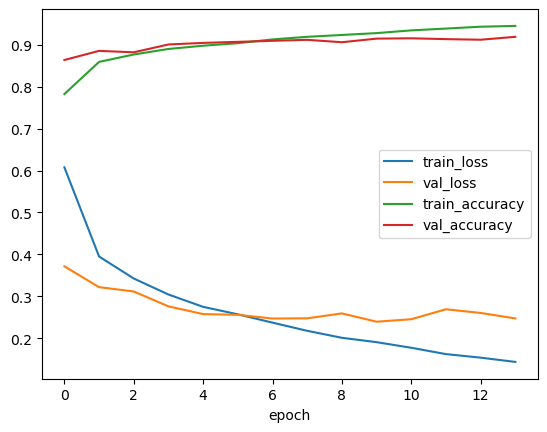

In [31]:
# Dropout 적용
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["val_loss"], label = "val_loss")

plt.plot(history.history["accuracy"], label = "train_accuracy")
plt.plot(history.history["val_accuracy"], label = "val_accuracy")

plt.legend()
plt.xlabel("epoch")
plt.show()

# 모델 성능 검증

In [32]:
scaled_test = x_test.reshape(-1, 28, 28, 1) / 255

In [33]:
model.evaluate(scaled_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9077 - loss: 0.2613   


[0.26134052872657776, 0.9077000021934509]

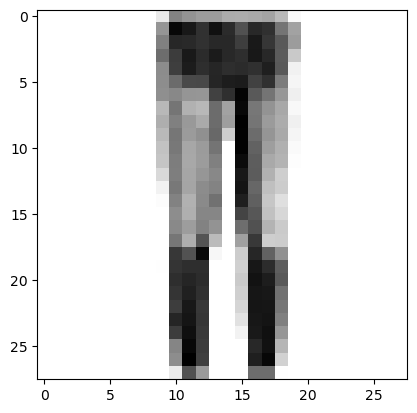

In [37]:
# 데이터 시각화
plt.imshow(scaled_test[3].reshape(28,28), cmap="gray_r")
plt.show()

In [45]:
preds = model.predict(scaled_test[[0]]) ### model 은 배치차원을 기대한다
preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[1.96430315e-13, 1.00000000e+00, 1.10329963e-14, 1.33205435e-11,
        1.03751513e-12, 2.22783165e-16, 4.58534713e-14, 1.01815372e-21,
        7.92550862e-17, 5.01457412e-19]], dtype=float32)

In [46]:
scaled_test[[0]].shape

(1, 28, 28, 1)

In [47]:
scaled_test[0].shape # 이러면 안됩니다!!!!!

(28, 28, 1)

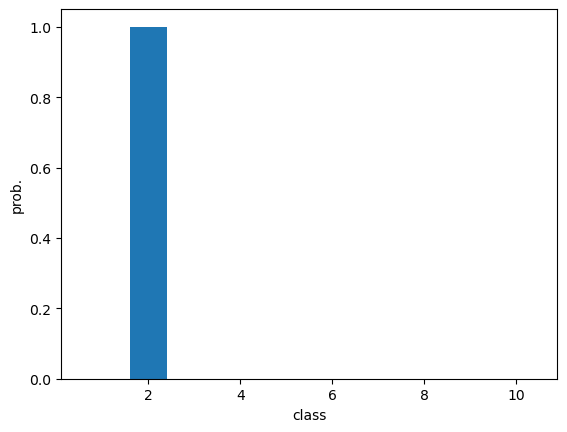

In [50]:
# 알아보기 힘드니 그래프를 그린다
plt.figure()
plt.bar(range(1, 11), preds[0])
plt.xlabel("class")
plt.ylabel("prob.")
plt.show()

In [51]:
# 정답값
y_test[0]

np.uint8(1)

In [54]:
# 예측값
np.argmax(preds)

np.int64(1)

In [53]:
# 정답을 잘 맞추고 있다!

- 주목 해야할점 그 다음 확률인 친구가 종류가 모두 신발종류다